In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import random


%matplotlib inline

In [30]:
import logging
import gensim
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

This notebook is to present basic text classification and compare few classification models

Data is stackoverflow.csv which is present in data folder in the project

In [3]:
#Read stack overflow data into pandas dataframe
df=pd.read_csv('data/stack-overflow-data.csv')


In [4]:
df.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


**I. Data Insights and Data Clean-up**

In [7]:
#Number of words in the dataset

print("Number of words in the dataset: ", df['post'].apply(lambda x: len(x.split(' '))).sum())

Number of words in the dataset:  10286120


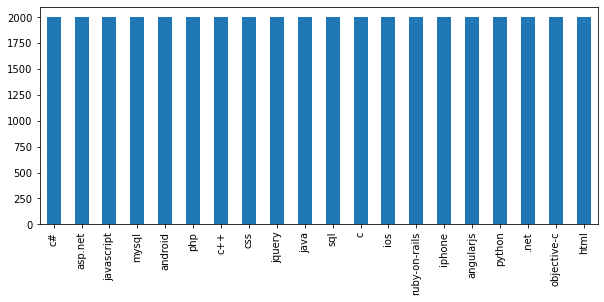

In [8]:
#Finding out what tags are available and tags can be considered as classes 

plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

From above the classes are balanced and does not need any methods to balance.

Let's check how the data is for each tag

In [9]:
def print_example(index):
    exampleContent = df[df.index == index][['post', 'tags']].values[0]
    if len(exampleContent) > 0:
        print(exampleContent[0])
        print('Tag:', exampleContent[1])

In [10]:
print(print_example(20))

java - hackerrank.com 30 days of code  day 6  hello stackoverflow peeps!    working to learn/improve my coding skills with hackerrank.com s 30 days of code. i m on day 6 and having some issues figuring out why i m getting this error message:     ~ no response on stdout ~     i ve done some searching on google and within stackoverflow and found others with the same error but it was because they weren t using standard i/o. i feel like i am  what am i missing     here s my code:   <pre><code>import java.io.*; import java.util.*; import java.text.*; import java.math.*; import java.util.regex.*;  public class solution {  public static void main(string[] args) { /* enter your code here. read input from stdin. print output to stdout. your class should be named solution. */      scanner sc = new scanner(system.in);     int cases = sc.nextint();      while(cases &gt; 0){         getword();         cases--;     }   }  public static void getword(){     //save input to string     scanner sc = new 

In [11]:
print(print_example(40))

custom ios ui control  sendactions with data  i m trying to build a custom control that you initialize with an array of strings  and then it creates labels one above the other for them that you can click.  i ve got it visually working  but the part about sending actions i m confused about.     <pre><code>internal func sharedinit() {     translatesautoresizingmaskintoconstraints = false      var labels = [uilabel]()     var tagindex = 0     for name in menunames {         let label = uilabel()         label.translatesautoresizingmaskintoconstraints = false         label.text = name         label.textcolor = tintcolor         label.isuserinteractionenabled = true         label.tag = tagindex         addtapgesturerecognizer(label: label)          labels.append(label)         addsubview(label)          tagindex += 1     }     menulabels = labels  internal func addtapgesturerecognizer(label: uilabel) {     let tapgesturerecognizer = uitapgesturerecognizer(target: self  action: #selector(sub

The content above shows for both tags java and ios. There are various tags as depicted in the above plot. Also, the text needs a lot of cleanup as it contains stopwords, symbols html codes etc.

In [16]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [17]:
df['post'] = df['post'].apply(clean_text)

c:\Users\suman\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
#Now, lets try printing the above tags if it is cleaned

print(print_example(20))

java hackerrankcom 30 days code day 6 hello stackoverflow peeps working learn improve coding skills hackerrankcom 30 days code day 6 issues figuring getting error message response stdout done searching google within stackoverflow found others error using standard feel like missing code import javaio import javautil import javatext import javamath import javautilregex public class solution public static void main string args enter code read input stdin print output stdout class named solution scanner sc new scanner systemin int cases scnextint cases 0 getword cases public static void getword save input string scanner sc new scanner systemin string userinput scnextline convert string character array char inputchararray userinputtochararray setup output strings string evenoutputstring string oddoutputstring iterate array int 0 userinputlength i++ check index even 2 0 add even output string evenoutputstring evenoutputstring + inputchararray else add odd output string oddoutputstring oddout

In [19]:
print(print_example(40))

custom ios ui control sendactions data trying build custom control initialize array strings creates labels one click got visually working part sending actions confused internal func sharedinit translatesautoresizingmaskintoconstraints false var labels uilabel var tagindex 0 name menunames let label uilabel labeltranslatesautoresizingmaskintoconstraints false labeltext name labeltextcolor tintcolor labelisuserinteractionenabled true labeltag tagindex addtapgesturerecognizer label label labelsappend label addsubview label tagindex + 1 menulabels labels internal func addtapgesturerecognizer label uilabel let tapgesturerecognizer uitapgesturerecognizer target self action #selector submenuviewhandletap _ labeladdgesturerecognizer tapgesturerecognizer func handletap _ sender uitapgesturerecognizer print senderview tag sendactions touchupinside want control able different action different labels pass touched sure targetaction add action actual control idea label selected right think would wor

On comparison for the same tags printed earlier (ios and java), now text is cleaned up and much better. Also, it looks like only 3 million rows are there after cleanup

In [20]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424153

In [21]:
#splitting up train and test data
X=df.post
y= df.tags

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)

Feature engineering is included for next few steps. To train the classifier, we need the raw text to convert into normalised tf-idf representation (tf-idf transformer). Then we run on several classifiers and compare

**II. Models:**

**1. Linear support vector machine using SGD**

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('cntvect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=1e-3, random_state=3, loss='hinge', penalty='l2', max_iter=6, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('cntvect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=6, random_state=3,
                               tol=None))])

In [38]:
%%time
from sklearn.metrics import classification_report

y_pred = sgd.predict(X_test)

def accuracy_classificationreport(y_pred,y_test):
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=np.unique(df.tags)))

accuracy_classificationreport(y_pred,y_test)

accuracy 0.78675
               precision    recall  f1-score   support

         .net       0.72      0.67      0.70       387
      android       0.85      0.92      0.88       416
    angularjs       0.90      0.95      0.93       412
      asp.net       0.77      0.79      0.78       397
            c       0.73      0.87      0.79       424
           c#       0.80      0.42      0.55       391
          c++       0.86      0.64      0.73       426
          css       0.70      0.93      0.80       384
         html       0.80      0.59      0.68       401
          ios       0.70      0.55      0.62       382
       iphone       0.71      0.64      0.67       415
         java       0.81      0.88      0.84       415
   javascript       0.78      0.78      0.78       393
       jquery       0.80      0.86      0.83       387
        mysql       0.84      0.82      0.83       403
  objective-c       0.67      0.73      0.70       401
          php       0.81      0.90      0.85   

In [28]:
np.unique(df.tags)

array(['.net', 'android', 'angularjs', 'asp.net', 'c', 'c#', 'c++', 'css',
       'html', 'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby-on-rails', 'sql'],
      dtype=object)

**2. Naive Bayes Classifier**


In [33]:
nb = Pipeline([('cntvect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('cntvect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [35]:
%%time

y_pred = nb.predict(X_test)
accuracy_classificationreport(y_pred,y_test)

accuracy 0.7545
               precision    recall  f1-score   support

         .net       0.56      0.66      0.61       387
      android       0.93      0.82      0.87       416
    angularjs       0.91      0.94      0.93       412
      asp.net       0.71      0.75      0.73       397
            c       0.75      0.87      0.80       424
           c#       0.70      0.53      0.60       391
          c++       0.83      0.72      0.77       426
          css       0.68      0.88      0.77       384
         html       0.64      0.65      0.65       401
          ios       0.59      0.68      0.63       382
       iphone       0.74      0.56      0.64       415
         java       0.83      0.76      0.79       415
   javascript       0.82      0.63      0.71       393
       jquery       0.72      0.79      0.75       387
        mysql       0.71      0.83      0.76       403
  objective-c       0.70      0.71      0.71       401
          php       0.81      0.82      0.81    

**3. Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('cntvect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=2, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(steps=[('cntvect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=2))])

In [39]:
y_pred = logreg.predict(X_test)
accuracy_classificationreport(y_pred,y_test)

accuracy 0.7825
               precision    recall  f1-score   support

         .net       0.62      0.63      0.62       387
      android       0.92      0.86      0.88       416
    angularjs       0.98      0.93      0.96       412
      asp.net       0.78      0.73      0.75       397
            c       0.81      0.84      0.82       424
           c#       0.58      0.62      0.60       391
          c++       0.81      0.75      0.78       426
          css       0.80      0.83      0.81       384
         html       0.62      0.75      0.68       401
          ios       0.66      0.59      0.63       382
       iphone       0.66      0.66      0.66       415
         java       0.83      0.80      0.81       415
   javascript       0.79      0.76      0.78       393
       jquery       0.80      0.86      0.83       387
        mysql       0.82      0.83      0.83       403
  objective-c       0.67      0.71      0.69       401
          php       0.84      0.83      0.84    

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline([('cntvect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2)),
                               ])
knn_model.fit(X_train, y_train)

Pipeline(steps=[('cntvect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=10))])

In [45]:
y_pred = knn_model.predict(X_test)
accuracy_classificationreport(y_pred,y_test)

accuracy 0.514375
               precision    recall  f1-score   support

         .net       0.44      0.55      0.49       387
      android       0.63      0.69      0.66       416
    angularjs       0.77      0.58      0.66       412
      asp.net       0.54      0.58      0.56       397
            c       0.47      0.72      0.57       424
           c#       0.40      0.30      0.34       391
          c++       0.54      0.48      0.51       426
          css       0.43      0.72      0.54       384
         html       0.29      0.58      0.39       401
          ios       0.43      0.38      0.40       382
       iphone       0.48      0.47      0.47       415
         java       0.57      0.47      0.52       415
   javascript       0.51      0.31      0.38       393
       jquery       0.47      0.49      0.48       387
        mysql       0.57      0.54      0.55       403
  objective-c       0.55      0.40      0.46       401
          php       0.70      0.46      0.55  